## Decision Tree classifier


In [14]:
# ipmort libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [15]:
df = sns.load_dataset("titanic")

In [16]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [18]:
X = df[['pclass','sex','age','sibsp','parch','fare']]
y = df['survived']

##category variable ko q convert kya jata into integer in machine learning ki prepocessing ma

In [19]:
#labal in coding
X = pd.get_dummies(X, columns=['sex'])

In [20]:
X.isnull().sum()

pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_female      0
sex_male        0
dtype: int64

In [21]:
X.age.fillna(value=X['age'].mean(), inplace=True)

C:\Users\Buzz Tech\AppData\Local\Temp\ipykernel_14652\3269121161.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X.age.fillna(value=X['age'].mean(), inplace=True)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#search random state from siciket learn library

In [23]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
y_pred = model.predict(X_test)

In [27]:
 #Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#or
print("accuracy", accuracy_score(y_test,y_pred))

Accuracy: 0.7541899441340782
accuracy 0.7541899441340782


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  
    
MAE = mean_absolute_error(y_true=y_test, y_pred=y_pred) 
MSE = mean_squared_error(y_true=y_test, y_pred=y_pred)  
RMSE =  mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
RS = r2_score(y_true=y_test, y_pred=y_pred)

print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("RS:", RS)

MAE: 0.24581005586592178
MSE: 0.24581005586592178
RMSE: 0.49579235156053164
RS: -0.01364221364221363


c:\New folder\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##interview## Precision:Precision measures the proportion of true positive predictions among all positive predictions

## interview
## Recall:Recall measures the proportionof true positive predictions among all positive instances.

In [70]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Calculate evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

Precision: 0.7164179104477612
Recall: 0.6575342465753424
F1 Score: 0.6857142857142857
Accuracy: 0.7541899441340782


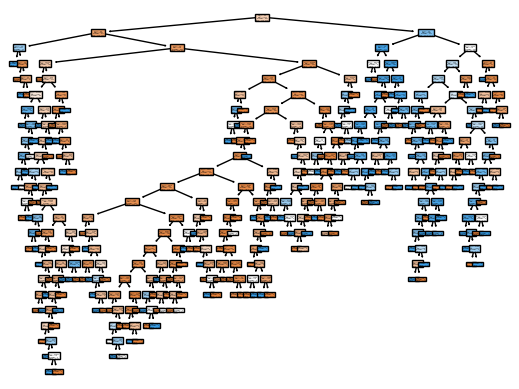

<Figure size 640x480 with 0 Axes>

In [71]:
tree.plot_tree(model.fit(X,y), filled=True)
plt.show()
plt.savefig("tree.png")

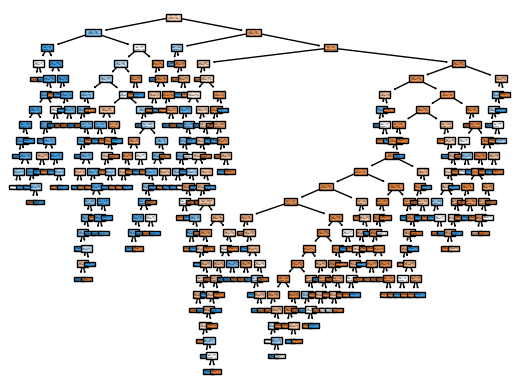

<Figure size 640x480 with 0 Axes>

In [72]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.Figure(figsize=(20,10))
tree.plot_tree(model.fit(X,y), filled=True)
plt.show()
plt.savefig("Decision_tree.pdf", format="pdf",dpi=300)

In [ ]:
# confusion_matrics: "confusion matrix," which is a table used to evaluate the performance of a 
# classification model. The confusion matrix summarizes the number of correct and incorrect
# predictions made by the model on a dataset.
              Predicted Class
            |  Positive | Negative |
Actual Class|---------------------|
  Positive  |    TP     |    FN    |
  Negative  |    FP     |    TN    |


In [82]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm


array([[87, 19],
       [25, 48]], dtype=int64)

<Axes: >

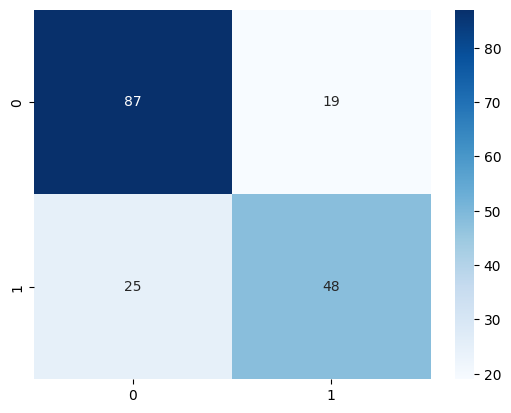

In [80]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

## K Nearest Neighbours(KNN)

In [93]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[81, 25],
       [28, 45]], dtype=int64)

In [100]:
precision_score(y_test, y_pred)


0.6428571428571429

In [98]:
recall_score(y_test, y_pred)

0.6164383561643836

In [102]:
f1_score(y_test, y_pred)

0.6293706293706294

<Axes: >

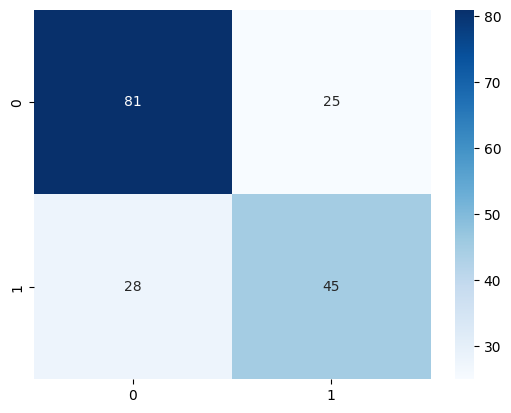

In [103]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


## Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("confusion_matrixs:",cm)
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1:", f1_score(y_test, y_pred))

confusion_matrixs: [[89 17]
 [26 47]]
precision: 0.734375
recall: 0.6438356164383562
f1: 0.6861313868613139


## Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("confusion_matrixs:",cm)
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1:", f1_score(y_test, y_pred))

confusion_matrixs: [[85 21]
 [26 47]]
precision: 0.6911764705882353
recall: 0.6438356164383562
f1: 0.6666666666666666


c:\Users\Buzz Tech\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## SVM

In [110]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("confusion_matrixs:",cm)
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1:", f1_score(y_test, y_pred))

confusion_matrixs: [[100   6]
 [ 49  24]]
precision: 0.8
recall: 0.3287671232876712
f1: 0.46601941747572817


## Naive Bayes

In [111]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("confusion_matrixs:",cm)
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1:", f1_score(y_test, y_pred))

confusion_matrixs: [[89 17]
 [24 49]]
precision: 0.7424242424242424
recall: 0.6712328767123288
f1: 0.7050359712230215


In [119]:
# import libraries and model
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# define the model to be evaluated
models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), SVC()]
names = ["Logistic Regression", "KNN", "Random Forest", "SVM"]

# perform k-fold cross_validation for each models
k=10
for name, model in zip(names, models):
    cv_score = cross_val_score(model, X_train, y_train, cv=k)
    print(f"{name} CV accuracy: {np.mean(cv_score):.3f} +/- {np.std(cv_score):.3f}")

c:\Users\Buzz Tech\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Buzz Tech\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

Logistic Regression CV accuracy: 0.799 +/- 0.041
KNN CV accuracy: 0.712 +/- 0.070
Random Forest CV accuracy: 0.826 +/- 0.043
SVM CV accuracy: 0.671 +/- 0.035


## Hyperparameter Tuning

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf'],  # Corrected 'kernel' instead of 'Kernal'
              'gamma': [0.1, 1, 10]}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best cross-validation score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best cross-validation score: 0.80


In [130]:
# import libraries and model
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# define the model to be evaluated
models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), SVC()]
names = ["Logistic Regression", "KNN", "Random Forest", "SVM"]

# perform k-fold cross_validation for each models
k=10
for name, model in zip(names, models):
    cv_score = cross_val_score(model, X_train, y_train, cv=k)
    print(f"{name} CV  f1_score: {np.mean(cv_score):.3f} +/- {np.std(cv_score):.3f}")

c:\Users\Buzz Tech\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Buzz Tech\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

Logistic Regression CV  f1_score: 0.799 +/- 0.041
KNN CV  f1_score: 0.712 +/- 0.070
Random Forest CV  f1_score: 0.829 +/- 0.035
SVM CV  f1_score: 0.671 +/- 0.035
